In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Ustawienie domyślnego rozmiaru czcionki
plt.rcParams.update({'font.size': 14})
g=9.81


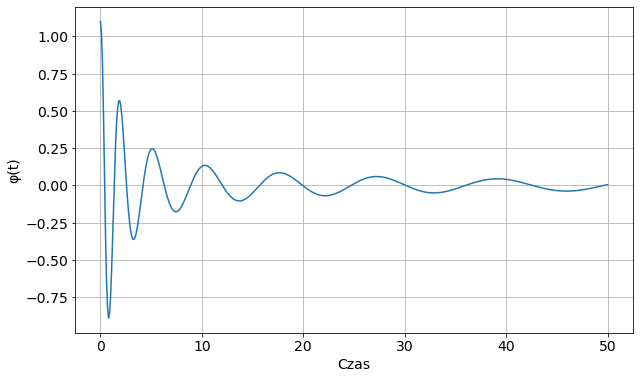

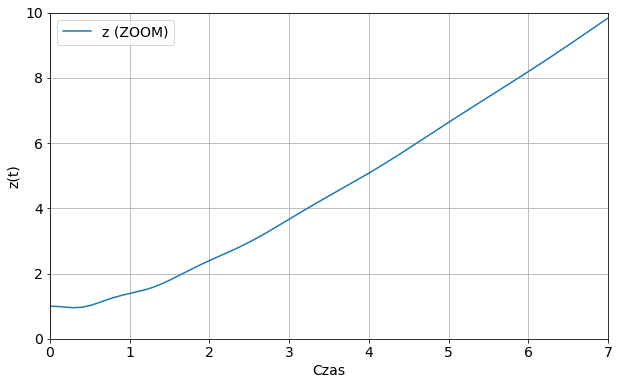

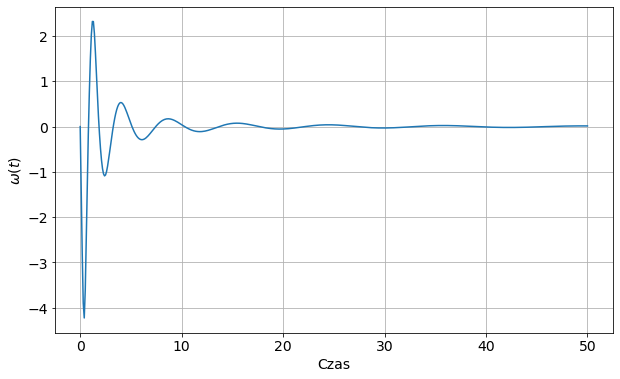

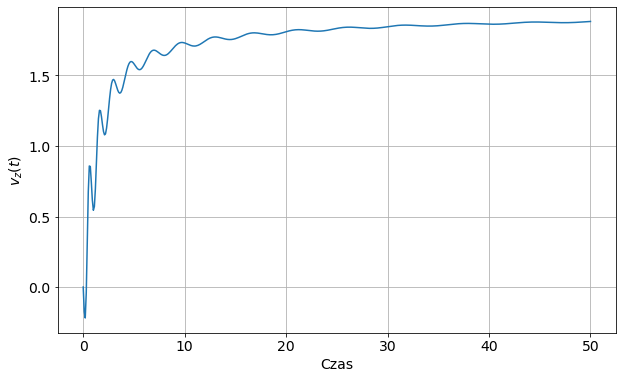

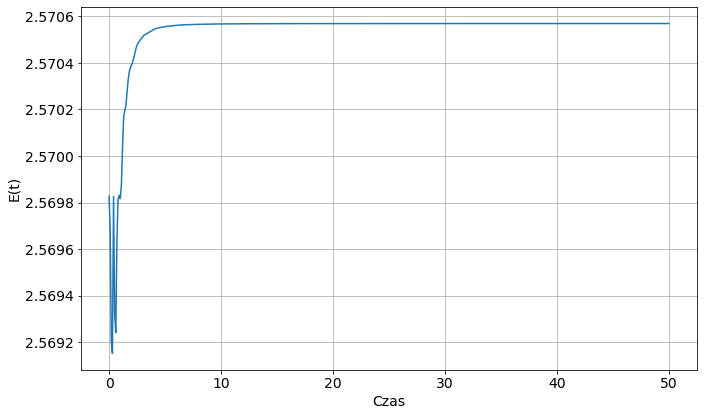

In [2]:

def f0(t, s, alpha):
    return s[2]

def f1(t, s, alpha):
    return s[3]

def f2(t, s, alpha):
    return -g * np.cos(alpha)**2/ np.sin(alpha) * np.sin(s[0])/s[1] - 2 * s[2] * s[3] / s[1]

def f3(t, s, alpha):
    return np.sin(alpha)**2 * s[1] * s[2]**2 - g * np.sin(alpha) * np.cos(alpha)**2 * (1 - np.cos(s[0]))

def pochodne(t, s, alpha):
    k = np.zeros(4)
    k[0] = f0(t, s, alpha)
    k[1] = f1(t, s, alpha)
    k[2] = f2(t, s, alpha)
    k[3] = f3(t, s, alpha)
    return k

def rk4_vec(t, s, dt, alpha):
    k1 = dt * pochodne(t, s, alpha)
    k2 = dt * pochodne(t + 0.5*dt, s + 0.5*k1, alpha)
    k3 = dt * pochodne(t + 0.5*dt, s + 0.5*k2, alpha)
    k4 = dt * pochodne(t + dt, s + k3, alpha)
    return s + (k1 + 2*k2 + 2*k3 + k4) / 6

def energia(s, alpha):
    return 0.5 * (np.tan(alpha)**2 * s[1]**2 * s[2]**2 + s[3]**2 / np.cos(alpha)**2) + g * s[1] * np.sin(alpha) * (1 - np.cos(s[0]))

def transformacja_Ry(theta):
    return np.array([[np.cos(theta), 0, np.sin(theta)], [0, 1, 0], [-np.sin(theta), 0, np.cos(theta)]])

def transformacja_do_lab(s, alpha):
    theta = np.pi / 2 - alpha
    R = transformacja_Ry(theta)
    rho = s[1] * np.tan(alpha) 
    x = rho * np.cos(s[0])  
    y = rho * np.sin(s[0])  
    z = s[1]
    
    r_lab = np.dot(R, np.array([x, y, z]))  # Transformacja do układu laboratoryjnego
    # bez sensu zrobione ik, ale nie miałam sił ładnie pisać spadajcie
    return r_lab


def symulacja_ruchu(alpha, dt, n, t0, phi0, z0, phi_dot0, z_dot0):
    czas = [t0]
    wyniki = np.zeros((n+1, 4))
    wyniki[0] = [phi0, z0, phi_dot0, z_dot0]

    for i in range(n):
        wyniki[i+1] = rk4_vec(czas[i], wyniki[i], dt, alpha)
        czas.append(czas[i] + dt)

    return czas, wyniki

def rysowanie_wynikow(czas, wyniki, alpha):
    phi = wyniki[:, 0]
    z = wyniki[:, 1]
    phi_dot = wyniki[:, 2]
    z_dot = wyniki[:, 3]
    energie = [energia(wynik, alpha) for wynik in wyniki]

    plt.figure(figsize=(10, 6))
    plt.plot(czas, phi)
    plt.xlabel('Czas')
    plt.ylabel('φ(t)')
    plt.grid()
    plt.savefig('kat_czas')
    
    plt.figure(figsize=(10, 6))
    plt.plot(czas, z, label='z (ZOOM)')
    plt.xlabel('Czas')
    plt.ylabel('z(t)')
    plt.grid()
    plt.legend()
    plt.xlim(0,7)
    plt.ylim(0,10)
    plt.savefig('z_ZOOM_czas')

    plt.figure(figsize=(10, 6))
    plt.plot(czas, phi_dot)
    plt.xlabel('Czas')
    plt.ylabel('$\omega(t)$')
    plt.grid()
    plt.savefig('omega_czas')

    plt.figure(figsize=(10, 6))
    plt.plot(czas, z_dot)
    plt.xlabel('Czas')
    plt.ylabel('$v_z(t)$')
    plt.grid()
    plt.savefig('vZ_czas')

    plt.figure(figsize=(10, 6))
    plt.plot(czas, energie)
    plt.xlabel('Czas')
    plt.ylabel('E(t)')
    plt.grid()
    plt.savefig('energia_czas')

    plt.tight_layout()
    plt.show()

def rysowanie_wykresu_x_y(wyniki, alpha=0.5):
    trajektoria_lab = np.array([transformacja_do_lab(s, alpha) for s in wyniki[:, :3]])
    x_prime = trajektoria_lab[:, 0]
    y_prime = trajektoria_lab[:, 1]
    z_prime = trajektoria_lab[:, 2]
    plt.figure(figsize=(10, 6))
    plt.plot(x_prime, y_prime)
    plt.xlabel("x'")
    plt.ylabel("y'")
    plt.grid()
    plt.savefig('xp_od_yp')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(y_prime, z_prime)
    plt.xlabel("y'")
    plt.ylabel("z'")
    plt.grid()
    plt.savefig('z_prim_yprim')
    plt.show()

def rysowanie_trajektorii_w_lab(wyniki, alpha=0.5):
    trajektoria_lab = np.array([transformacja_do_lab(s, alpha) for s in wyniki[:, :3]])
    x_lab = trajektoria_lab[:, 0]
    y_lab = trajektoria_lab[:, 1]
    z_lab = trajektoria_lab[:, 2]

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(x_lab, y_lab, z_lab)
    ax.set_xlabel("x'")
    ax.set_ylabel("y'")
    ax.set_zlabel("z'")
    #ax.set_title("Trajektoria w układzie laboratoryjnym")
    ax.legend()
    plt.savefig('trajectoyr_lab')

    plt.show()

# Parametry symulacji
alpha = 0.5
dt = 0.1
n = 500
t0 = 0
phi0 = 1.1
z0 = 1.0
phi_dot0 = 0
z_dot0 = 0


# Symulacja ruchu
czas, wyniki = symulacja_ruchu(alpha, dt, n, t0, phi0, z0, phi_dot0, z_dot0)

# Rysowanie wyników
rysowanie_wynikow(czas, wyniki, alpha)




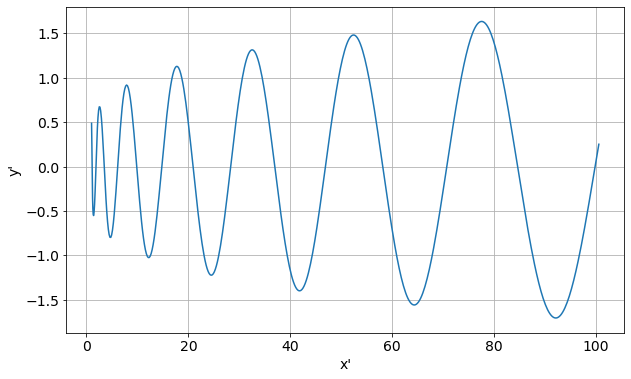

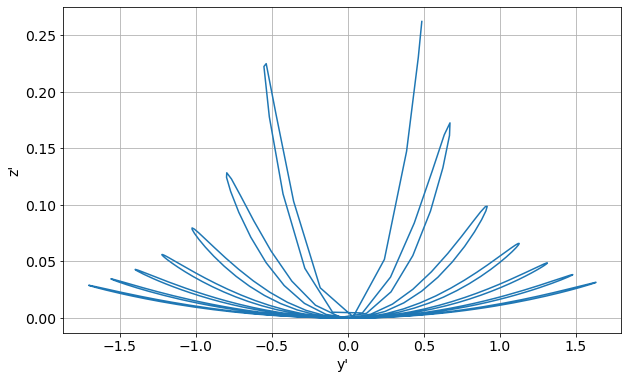

No handles with labels found to put in legend.


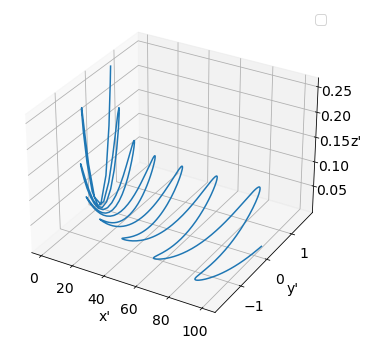

In [3]:
# Wywołanie funkcji rysującej wykres x' od y'
rysowanie_wykresu_x_y(wyniki, alpha)

# Rysowanie trajektorii w układzie laboratoryjnym
rysowanie_trajektorii_w_lab(wyniki, alpha)

No handles with labels found to put in legend.


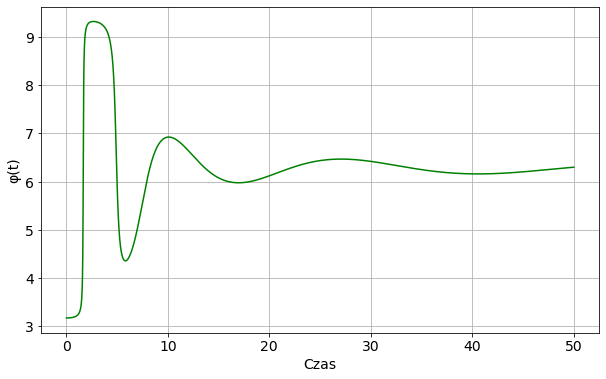

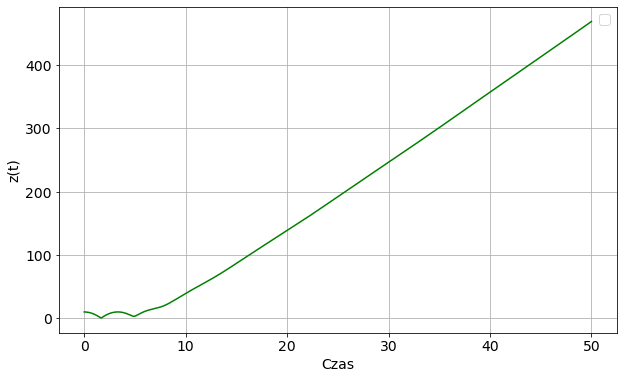

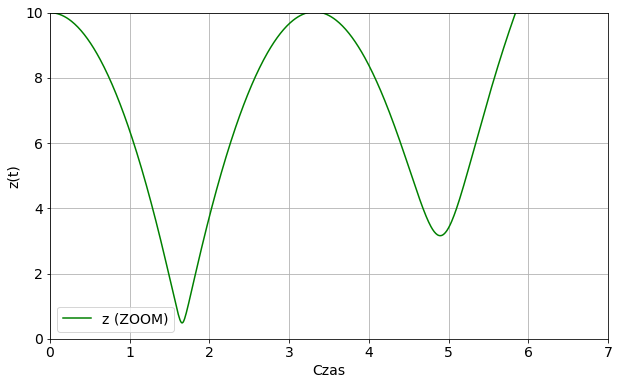

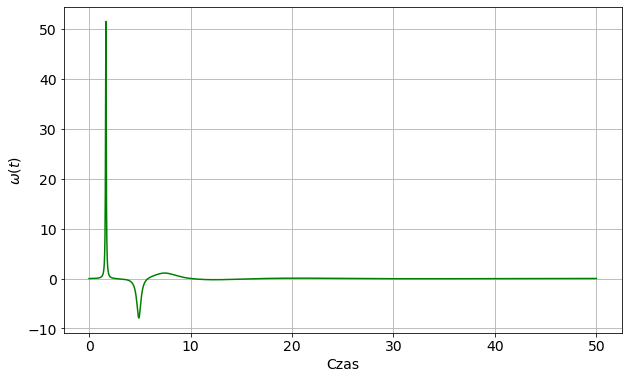

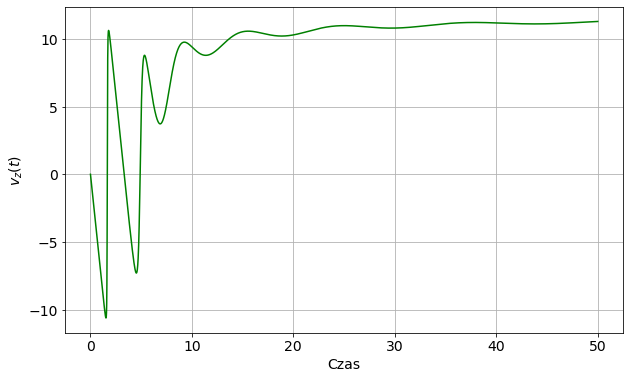

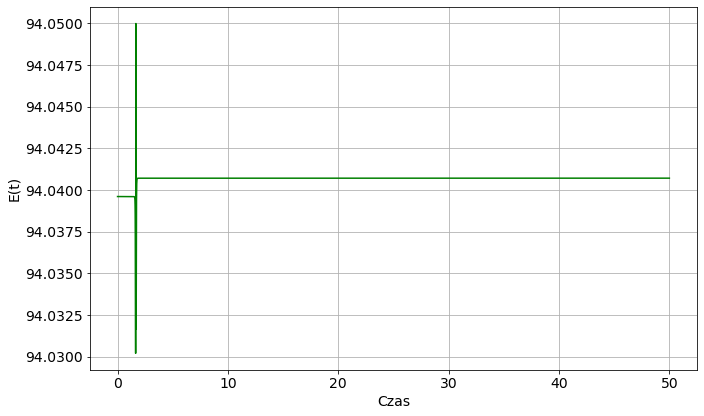

In [4]:
# Parametry symulacji
alpha = 0.5
dt = 0.01
n = 5000
t0 = 0
phi0 = np.pi/0.99
z0 = 10.0
phi_dot0 = 0
z_dot0 = 0

def rysowanie_wynikow(czas, wyniki, alpha):
    phi = wyniki[:, 0]
    z = wyniki[:, 1]
    phi_dot = wyniki[:, 2]
    z_dot = wyniki[:, 3]
    energie = [energia(wynik, alpha) for wynik in wyniki]

    plt.figure(figsize=(10, 6))
    plt.plot(czas, phi, c = 'g')
    plt.xlabel('Czas')
    plt.ylabel('φ(t)')
    plt.grid()
    plt.savefig('2_kat_czas')
    
    plt.figure(figsize=(10, 6))
    plt.plot(czas, z, c = 'g')
    plt.xlabel('Czas')
    plt.ylabel('z(t)')
    plt.grid()
    plt.legend()
    plt.savefig('2_z_czas')
    
    plt.figure(figsize=(10, 6))
    plt.plot(czas, z, label='z (ZOOM)', c = 'g')
    plt.xlabel('Czas')
    plt.ylabel('z(t)')
    plt.grid()
    plt.legend()
    plt.xlim(0,7)
    plt.ylim(0,10)
    plt.savefig('2_z_ZOOM_czas')


    plt.figure(figsize=(10, 6))
    plt.plot(czas, phi_dot, c = 'g')
    plt.xlabel('Czas')
    plt.ylabel('$\omega(t)$')
    plt.grid()
    plt.savefig('2_omega_czas')

    plt.figure(figsize=(10, 6))
    plt.plot(czas, z_dot, c = 'g')
    plt.xlabel('Czas')
    plt.ylabel('$v_z(t)$')
    plt.grid()
    plt.savefig('2_vZ_czas')

    plt.figure(figsize=(10, 6))
    plt.plot(czas, energie, c = 'g')
    plt.xlabel('Czas')
    plt.ylabel('E(t)')
    plt.grid()
    plt.savefig('2_energia_czas')

    plt.tight_layout()
    plt.show()

def rysowanie_wykresu_x_y(wyniki, alpha=0.5):
    trajektoria_lab = np.array([transformacja_do_lab(s, alpha) for s in wyniki[:, :3]])
    x_prime = trajektoria_lab[:, 0]
    y_prime = trajektoria_lab[:, 1]
    z_prime = trajektoria_lab[:, 2]
    plt.figure(figsize=(10, 6))
    plt.plot(x_prime, y_prime, c = 'g')
    plt.xlabel("x'")
    plt.ylabel("y'")
    plt.grid()
    plt.savefig('2_xp_od_yp')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(y_prime, z_prime, c = 'g')
    plt.xlabel("y'")
    plt.ylabel("z'")
    plt.grid()
    plt.savefig('2_z_prim_yprim')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(x_prime, z_prime, c = 'g')
    plt.xlabel("x'")
    plt.ylabel("z'")
    plt.grid()
    plt.savefig('2_z_prim_xprim')
    plt.show()

def rysowanie_trajektorii_w_lab(wyniki, alpha=0.5):
    trajektoria_lab = np.array([transformacja_do_lab(s, alpha) for s in wyniki[:, :3]])
    x_lab = trajektoria_lab[:, 0]
    y_lab = trajektoria_lab[:, 1]
    z_lab = trajektoria_lab[:, 2]

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(x_lab, y_lab, z_lab, c = 'g')
    ax.set_xlabel("x'")
    ax.set_ylabel("y'")
    ax.set_zlabel("z'")
    #ax.set_title("Trajektoria w układzie laboratoryjnym")
    ax.legend()
    plt.savefig('2_trajectoyr_lab')

    plt.show()

# Symulacja ruchu
czas, wyniki = symulacja_ruchu(alpha, dt, n, t0, phi0, z0, phi_dot0, z_dot0)

# Rysowanie wyników
rysowanie_wynikow(czas, wyniki, alpha)



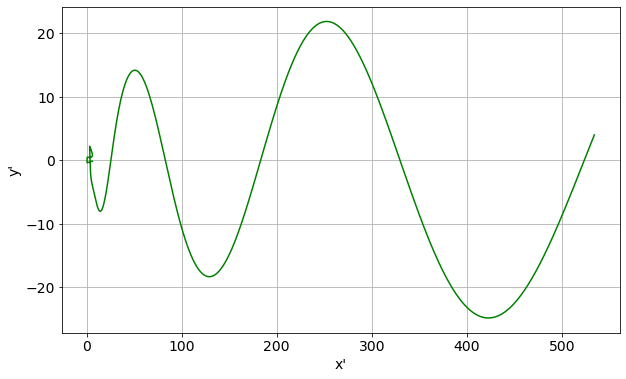

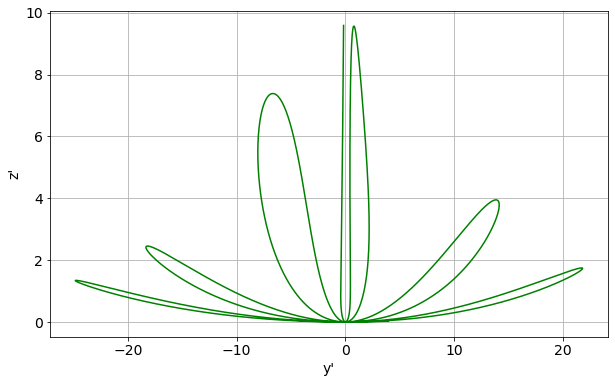

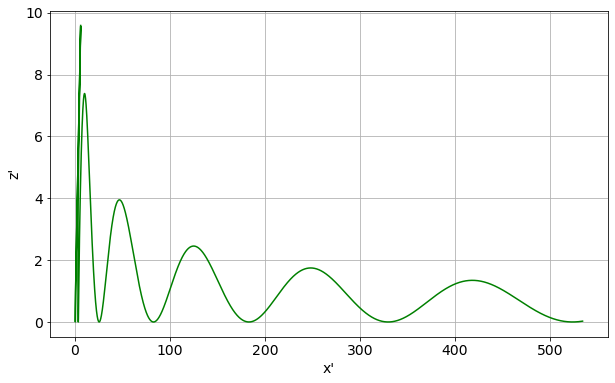

No handles with labels found to put in legend.


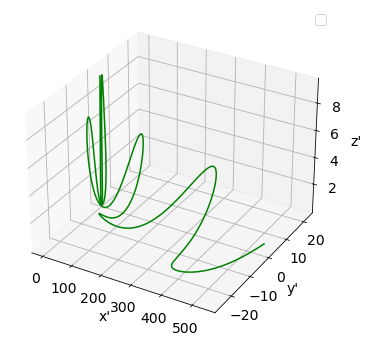

In [5]:
# Wywołanie funkcji rysującej wykres x' od y'
rysowanie_wykresu_x_y(wyniki, alpha)

# Rysowanie trajektorii w układzie laboratoryjnym
rysowanie_trajektorii_w_lab(wyniki, alpha)